In [92]:
from sklearn.datasets import load_boston
import numpy as np

boston = load_boston()

x_boston = boston.data
y_boston = boston.target
print(x_boston[0])


[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


In [93]:
mean = x_boston.mean(axis=0)
std = x_boston.std(axis=0)

x_boston = (x_boston-mean)/std

In [94]:
#error function
def cost_func(x,y,w):
    n_count = len(y)
    y_pred = np.dot(x,w)
    mse = np.sum((y_pred-y)**2/(2*n_count))
    return mse

#gradient function
def gradient(x,y,w):
    n_count = len(y)
    y_pred = np.dot(x,w)
    grad = np.dot(x.T, (y_pred-y)/n_count)
    return grad

def gradient_descent(x,y,w_init,lr,epochs):
    w = w_init
    for i in range(epochs):
        grad = gradient(x,y,w)
        w = w - lr*grad
        mse = cost_func(x,y,w)
        if i % 100 == 0:
            print(f"Эпоха {i}: Ошибка={mse}")
    return w

In [95]:
x_boston = np.hstack((np.ones((x_boston.shape[0], 1)), x_boston))

w_init = np.zeros(x_boston.shape[1])
print(list(x_boston[0]))
lr = 0.01
epochs = 1000


w = gradient_descent(x_boston, y_boston, w_init, lr, epochs)
print('wesa', w)

[1.0, -0.4197819386460084, 0.2848298609673567, -1.2879094989577484, -0.2725985670699254, -0.14421743255530006, 0.4136718893017465, -0.1200134161980508, 0.1402136034929299, -0.9828428567665046, -0.6666082090210975, -1.4590003802772087, 0.44105193260704206, -1.075562304567866]
Эпоха 0: Ошибка=288.8083019669832
Эпоха 100: Ошибка=46.781047351381396
Эпоха 200: Ошибка=16.442039759103913
Эпоха 300: Ошибка=12.21960383265357
Эпоха 400: Ошибка=11.52752662327109
Эпоха 500: Ошибка=11.343977566392976
Эпоха 600: Ошибка=11.252882327444924
Эпоха 700: Ошибка=11.190976518642467
Эпоха 800: Ошибка=11.14489842615451
Эпоха 900: Ошибка=11.10955693423547
wesa [22.53183355 -0.78102837  0.81194215 -0.27316748  0.74256629 -1.57697862
  2.88943522 -0.10349181 -2.74240875  1.45982586 -0.88309816 -1.95217556
  0.87224133 -3.64278025]


In [96]:
data_x = x_boston[0]
y  = np.dot(data_x, w)
print(y)
print(y_boston[0])

30.595823147465435
24.0


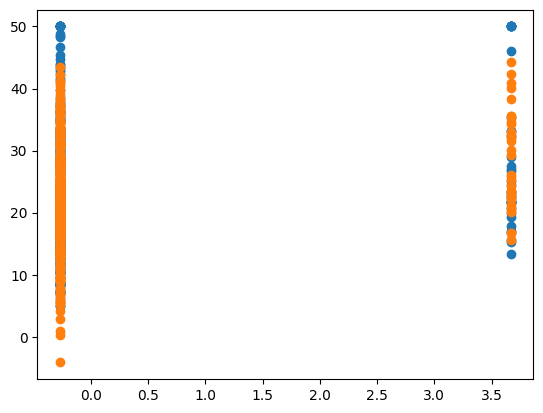

In [100]:
import matplotlib.pyplot as plt

x = []
y_1 = y_boston
y_2 = []
for i in range(len(x_boston)):
    y_2.append(np.dot(x_boston[i], w))

for i in range(len(x_boston)):
    x.append(x_boston[i][-10])

plt.scatter(x,y_1)
plt.scatter(x,y_2)

plt.show()